In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

- mu_15: 15분당 평균 대여 자전거 수
- lambda_15: 15분당 평균 반납 자전거 수
- L_s : 대여소 내 평균 자전거 수
- W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

In [2]:
df = pd.read_excel('./data/12월 대여소별 Ls, Lq, Ws, Wq.xlsx')
df

,자치구,대여소명,시간,lambda_15,mu_15,rho,p_c,L_s,L_q,W_s,W_q
0,중랑구,(구)신한은행 중랑교지점,0,0.161290,0.217742,0.740741,0.100458,1.422025,0.755697,9.801160,5.208568
1,중랑구,(구)신한은행 중랑교지점,1,0.080645,0.112903,0.714286,0.091361,1.357989,0.708961,18.532175,9.675032
2,중랑구,(구)신한은행 중랑교지점,2,0.080645,0.104839,0.769231,0.110582,1.490308,0.806139,20.777412,11.238950
3,중랑구,(구)신한은행 중랑교지점,3,0.032258,0.048387,0.666667,0.075829,1.241706,0.625592,41.651282,20.984615
4,중랑구,(구)신한은행 중랑교지점,4,0.008065,0.064516,0.125000,0.000214,0.142705,0.017731,17.699145,2.199145
...,...,...,...,...,...,...,...,...,...,...,...
49857,강서구,힐스테이트에코,19,0.629032,0.637097,0.987342,0.194937,1.974524,1.179652,3.899057,2.329437
49858,강서구,힐스테이트에코,20,0.532258,0.612903,0.868421,0.147871,1.720248,0.980241,3.792832,2.161253
49859,강서구,힐스테이트에코,21,0.419355,0.596774,0.702703,0.087478,1.329800,0.688569,3.475055,1.799379
49860,강서구,힐스테이트에코,22,0.233871,0.387097,0.604167,0.057357,1.088591,0.519078,4.937888,2.354555


In [3]:
df = df.drop(['p_c', 'L_q', 'W_q'], axis = 1)
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s
0,중랑구,(구)신한은행 중랑교지점,0,0.161290,0.217742,0.740741,1.422025,9.801160
1,중랑구,(구)신한은행 중랑교지점,1,0.080645,0.112903,0.714286,1.357989,18.532175
2,중랑구,(구)신한은행 중랑교지점,2,0.080645,0.104839,0.769231,1.490308,20.777412
3,중랑구,(구)신한은행 중랑교지점,3,0.032258,0.048387,0.666667,1.241706,41.651282
4,중랑구,(구)신한은행 중랑교지점,4,0.008065,0.064516,0.125000,0.142705,17.699145


# 자치구별(시간 제외)

In [4]:
dft_pivot_lambda = df.pivot_table(index = ['자치구'], values = ['lambda_15']).T
dft_pivot_lambda.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.101139,0.166116,0.136596,0.279938,0.213543,0.260149,0.180832,0.1357,0.253137,0.149981,0.228263,0.154281,0.235951,0.144923,0.12092,0.213341,0.178081,0.215549,0.254703,0.291554,0.120672,0.157851,0.164452,0.154841,0.159269


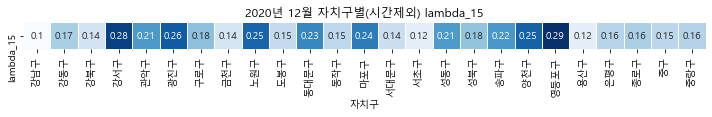

In [5]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 자치구별(시간제외) lambda_15')
plt.tight_layout()
plt.show()

In [6]:
dft_pivot_lambda_std = df.pivot_table(index = ['자치구'], values = ['lambda_15'], aggfunc = 'std').T
dft_pivot_lambda_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.12544,0.214519,0.154316,0.348769,0.310688,0.307668,0.281278,0.218095,0.26314,0.169874,0.233854,0.186653,0.287041,0.168753,0.170936,0.311019,0.217332,0.252496,0.30165,0.364658,0.163822,0.234,0.197382,0.183751,0.173045


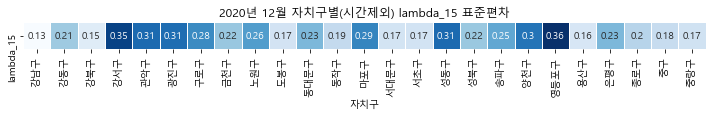

In [7]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 자치구별(시간제외) lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [8]:
dft_pivot_mu = df.pivot_table(index = ['자치구'], values = ['mu_15']).T
dft_pivot_mu.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.106983,0.163658,0.137831,0.279338,0.217371,0.258207,0.180047,0.136761,0.252679,0.148712,0.223848,0.152192,0.227723,0.156234,0.12022,0.210234,0.17993,0.212898,0.253176,0.29251,0.119961,0.155932,0.170016,0.16042,0.1588


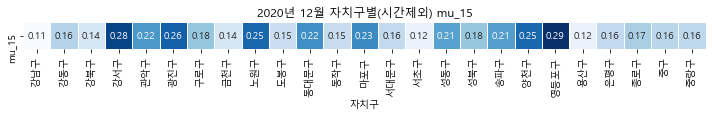

In [9]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 자치구별(시간제외) mu_15')
plt.tight_layout()
plt.show()

In [10]:
dft_pivot_mu_std = df.pivot_table(index = ['자치구'], values = ['mu_15'], aggfunc = 'std').T
dft_pivot_mu_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.124004,0.198758,0.150636,0.331266,0.285519,0.274879,0.266973,0.197657,0.248215,0.15208,0.218323,0.158302,0.259974,0.158503,0.158662,0.284863,0.194114,0.246681,0.281473,0.345872,0.152802,0.201431,0.192446,0.176714,0.158497


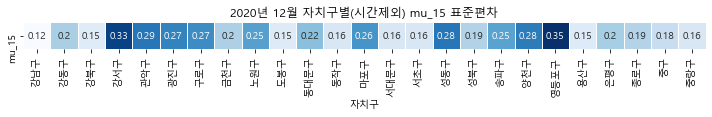

In [11]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 자치구별(시간제외) mu_15 표준편차')
plt.tight_layout()
plt.show()

In [12]:
dft_pivot_rho = df.pivot_table(index = ['자치구'], values = ['rho']).T
dft_pivot_rho.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
rho,1.209466,1.17824,1.135601,1.290634,1.210049,1.283958,1.362722,1.455106,1.271574,1.255747,1.33249,1.229182,1.436923,1.153772,1.132426,1.244409,1.242413,1.215837,1.289612,1.366851,1.087211,1.162131,1.164824,1.239991,1.177645


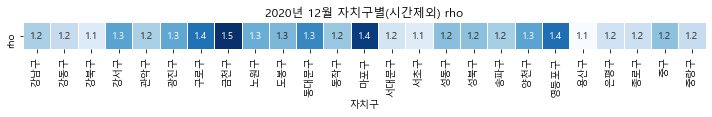

In [13]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 자치구별(시간제외) rho')
plt.tight_layout()
plt.show()

In [14]:
dft_pivot_L_s = df.pivot_table(index = ['자치구'], values = ['L_s']).T
dft_pivot_L_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,0.340711,0.778021,0.588311,1.395776,1.013123,1.365461,0.778332,0.463022,1.309583,0.67322,1.163228,0.673774,1.258033,0.622987,0.540006,1.044818,0.864878,1.089023,1.414892,1.504259,0.536985,0.777794,0.741634,0.653087,0.726675


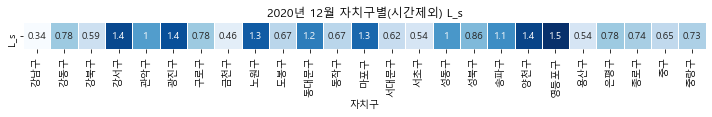

In [15]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 자치구별(시간제외) L_s')
plt.tight_layout()
plt.show()

In [16]:
dft_pivot_L_s_std = df.pivot_table(index = ['자치구'], values = ['L_s'], aggfunc = 'std').T
dft_pivot_L_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,0.489229,1.073468,0.711418,1.609745,1.673545,1.722038,1.181739,0.70553,1.340636,0.948978,1.081594,0.882383,1.492568,0.760606,0.856218,1.425876,1.162385,1.360302,1.617505,1.740986,0.823971,1.301322,0.906468,0.79844,0.789939


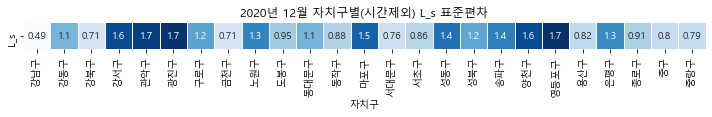

In [17]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 자치구별(시간제외) L_s 표준편차')
plt.tight_layout()
plt.show()

In [18]:
dft_pivot_W_s = df.pivot_table(index = ['자치구'], values = ['W_s']).T
dft_pivot_W_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,10.30168,15.104299,11.942892,21.079465,14.228251,20.440528,16.087203,11.724927,19.716398,14.874366,19.409423,12.666049,23.555633,14.32161,14.744372,18.01543,15.094965,20.058848,25.251626,25.665123,13.049795,12.994811,18.381615,14.645201,14.193609


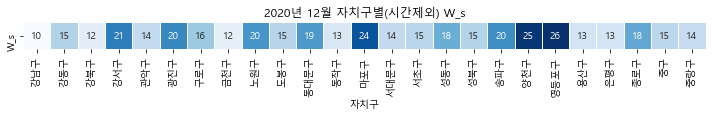

In [19]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 자치구별(시간제외) W_s')
plt.tight_layout()
plt.show()

In [20]:
dft_pivot_W_s_std = df.pivot_table(index = ['자치구'], values = ['W_s'], aggfunc = 'std').T
dft_pivot_W_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,28.782274,38.34559,25.716874,58.941734,40.953599,58.04554,46.652634,26.675349,52.962723,40.463073,48.973514,32.631599,57.748542,31.611959,42.835597,54.109852,34.998133,63.25523,68.482554,73.987063,42.323332,36.902328,49.922854,38.583361,35.763726


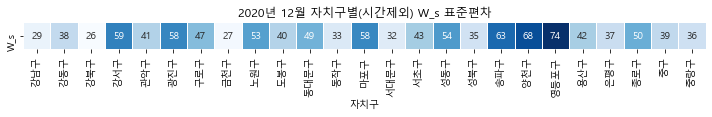

In [21]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 자치구별(시간제외) W_s 표준편차')
plt.tight_layout()
plt.show()

# 자치구별 시간별

In [22]:
df_pivot_lambda = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'])
df_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.043496  0.039502  0.034923  0.022417  0.010388  0.008475  0.020708   
강동구  0.078071  0.059659  0.050075  0.026632  0.019599  0.028695  0.060671   
강북구  0.093414  0.071077  0.061372  0.040869  0.034855  0.029661  0.037179   
강서구  0.092864  0.073097  0.051296  0.034836  0.025912  0.034638  0.076018   
관악구  0.115856  0.109753  0.072453  0.056964  0.037890  0.044035  0.063108   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.070872  0.155549  0.131151  0.090350  0.098756  0.116799  0.132723   
강동구  0.110746  0.242686  0.141035  0.114029  0.139910  0.193923  0.221868   
강북구  0.080508  0.183297  0.102515  0.087479  0.116047  0.150219  0.173729   
강서구  0.213379  0.586528  0.305196  0.214569  0.256081  0.334082  0.347105   
관악구  0.104839  0.239631  0.180364  0.154762  0.168843  0.217230  0.254096   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.140582  0.158762  0.180700  0.211113  0.222936  0.163409  0.117551   
강동구  0.230214  0.253845  0.279539  0.313203  0.374719  0.288541  0.234621   
강북구  0.193138  0.206944  0.242346  0.260388  0.287589  0.213915  0.190131   
강서구  0.366473  0.392517  0.442623  0.566433  0.722435  0.490547  0.363168   
관악구  0.276882  0.319252  0.349462  0.417435  0.500384  0.413210  0.310292   

                                   
시간         21        22        23  
자치구                                
강남구  0.120489  0.082490  0.055153  
강동구  0.253751  0.172918  0.108496  
강북구  0.184664  0.139420  0.098278  
강서구  0.366274  0.234995  0.147871  
관악구  0.342550  0.228111  0.161674

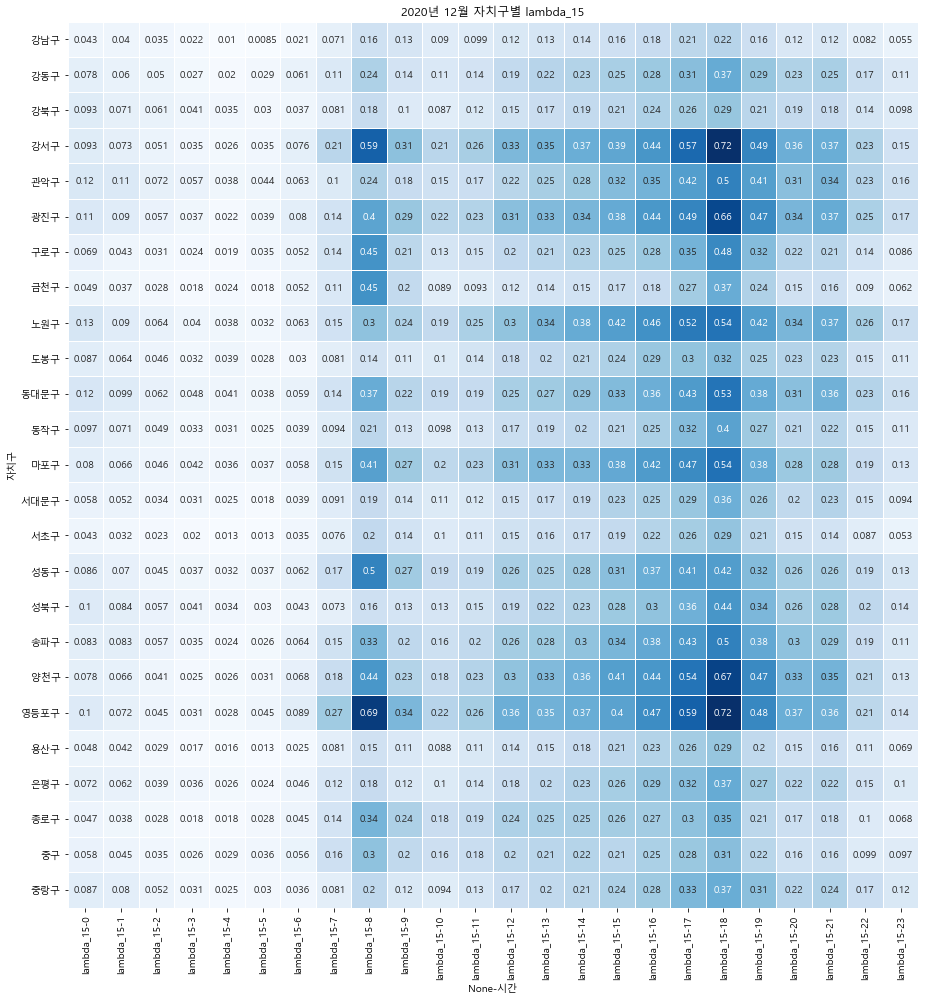

In [23]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 자치구별 lambda_15')
plt.tight_layout()
plt.show()

In [24]:
df_pivot_lambda_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
df_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.045791  0.039877  0.037175  0.025830  0.014384  0.019721  0.037315   
강동구  0.093070  0.069723  0.055970  0.038029  0.037184  0.047744  0.103141   
강북구  0.081017  0.068552  0.061290  0.046081  0.042553  0.045655  0.052457   
강서구  0.089178  0.074363  0.057756  0.039430  0.035710  0.051806  0.134905   
관악구  0.124408  0.110991  0.082389  0.083242  0.038175  0.084963  0.130097   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.128738  0.215869  0.163186  0.091844  0.085665  0.091797  0.099915   
강동구  0.165497  0.353481  0.193195  0.122929  0.139664  0.170613  0.193927   
강북구  0.122730  0.234536  0.110220  0.075203  0.118126  0.121087  0.150533   
강서구  0.323981  0.652250  0.328485  0.203674  0.224432  0.252950  0.271175   
관악구  0.158740  0.362618  0.239825  0.161679  0.174636  0.223170  0.251672   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.115447  0.125635  0.148096  0.168668  0.193179  0.128157  0.083646   
강동구  0.210263  0.215809  0.228560  0.278125  0.350647  0.255758  0.211724   
강북구  0.165683  0.165332  0.218720  0.205557  0.225735  0.158996  0.138603   
강서구  0.289921  0.289890  0.337534  0.477769  0.569227  0.360787  0.276738   
관악구  0.293295  0.362980  0.414476  0.492879  0.553972  0.465094  0.354687   

                                   
시간         21        22        23  
자치구                                
강남구  0.092764  0.069689  0.051395  
강동구  0.238231  0.177016  0.107854  
강북구  0.149039  0.111665  0.085785  
강서구  0.278318  0.182780  0.114019  
관악구  0.382470  0.230862  0.174314

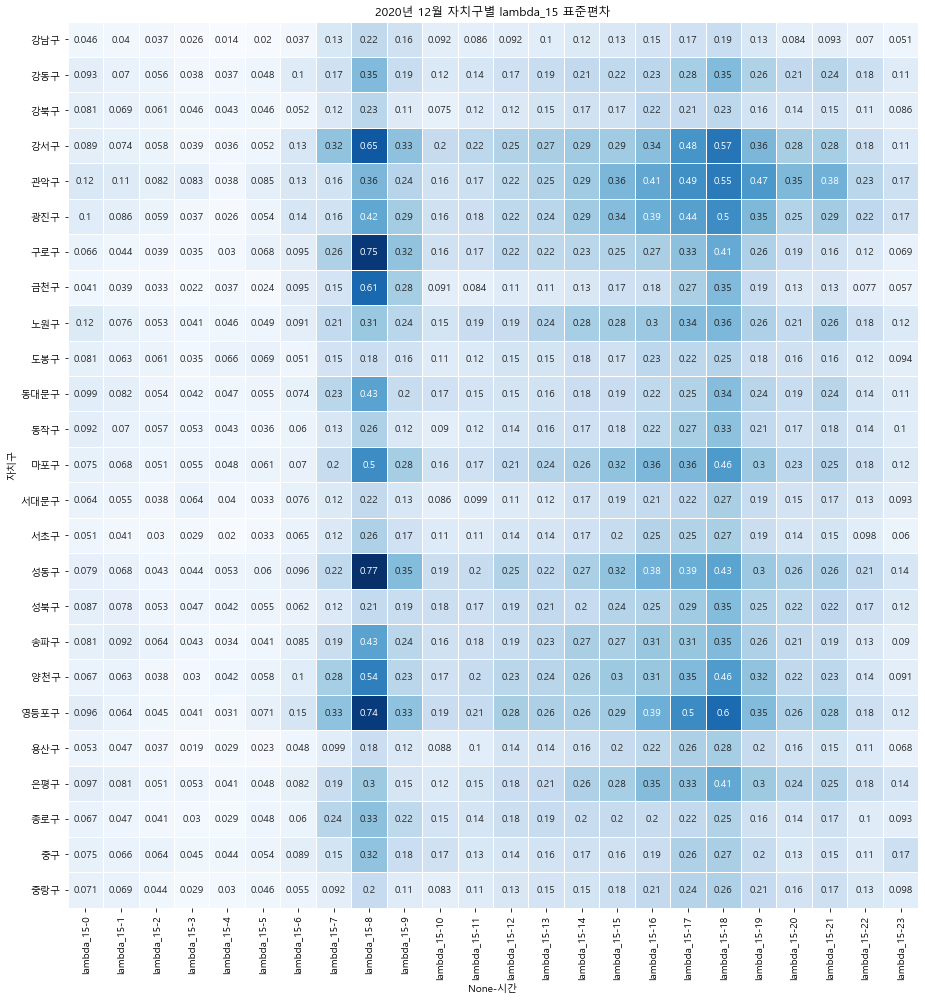

In [25]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 자치구별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [26]:
df_pivot_mu = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'])
df_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.040058  0.036700  0.031506  0.020298  0.010730  0.012028  0.032121   
강동구  0.066404  0.051686  0.030101  0.021474  0.021099  0.042104  0.066954   
강북구  0.095027  0.069574  0.047157  0.031985  0.031028  0.028021  0.043876   
강서구  0.086694  0.067032  0.044751  0.032985  0.027366  0.040719  0.094130   
관악구  0.101999  0.095388  0.072709  0.050435  0.038658  0.044931  0.081029   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.061031  0.142564  0.117346  0.094861  0.112220  0.129169  0.145230   
강동구  0.152569  0.263785  0.149944  0.139535  0.168886  0.216898  0.232277   
강북구  0.092264  0.166348  0.106479  0.100738  0.137917  0.167305  0.201203   
강서구  0.258263  0.577076  0.291777  0.231888  0.289595  0.362242  0.363234   
관악구  0.182796  0.344086  0.211854  0.190220  0.211726  0.251920  0.293139   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.166826  0.175916  0.198606  0.241047  0.263737  0.166484  0.129237   
강동구  0.253657  0.262284  0.274287  0.299231  0.329614  0.234715  0.224775   
강북구  0.212001  0.224576  0.236331  0.246720  0.293330  0.196692  0.182750   
강서구  0.392649  0.399392  0.444209  0.590891  0.703794  0.429733  0.353649   
관악구  0.314516  0.340886  0.344854  0.390297  0.411162  0.328981  0.291731   

                                   
시간         21        22        23  
자치구                                
강남구  0.122745  0.073879  0.045517  
강동구  0.204801  0.136815  0.095555  
강북구  0.184117  0.118917  0.094314  
강서구  0.317491  0.196192  0.129363  
관악구  0.314132  0.191372  0.134665

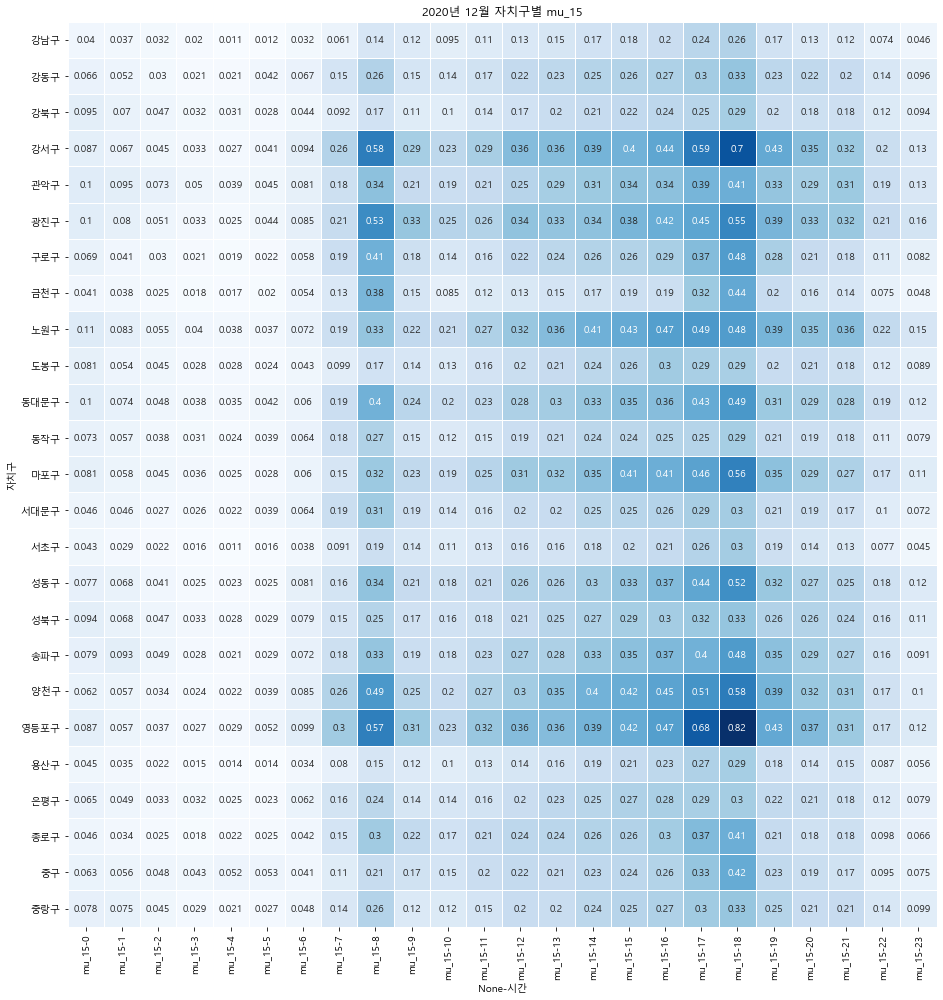

In [27]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 자치구별 mu_15')
plt.tight_layout()
plt.show()

In [28]:
df_pivot_mu_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
df_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.034339  0.028245  0.031876  0.023405  0.016573  0.028561  0.045314   
강동구  0.079311  0.067712  0.036601  0.030417  0.037464  0.069190  0.105606   
강북구  0.105724  0.070207  0.055466  0.037647  0.042325  0.045184  0.056477   
강서구  0.093833  0.065600  0.050391  0.037584  0.039325  0.050473  0.095423   
관악구  0.108609  0.089855  0.120694  0.091147  0.053536  0.085675  0.128514   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.069769  0.151831  0.106975  0.076968  0.087365  0.094284  0.097338   
강동구  0.166946  0.291403  0.165719  0.124690  0.141333  0.183520  0.181832   
강북구  0.095951  0.146015  0.082986  0.071151  0.094591  0.119350  0.131566   
강서구  0.240311  0.539771  0.235920  0.144487  0.189465  0.234933  0.245502   
관악구  0.248147  0.376241  0.206152  0.181347  0.203776  0.210121  0.254904   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.113599  0.124788  0.132952  0.186968  0.217054  0.132579  0.103182   
강동구  0.206143  0.212021  0.219202  0.281977  0.315905  0.227703  0.215465   
강북구  0.142920  0.156791  0.157884  0.216104  0.285398  0.179899  0.168123   
강서구  0.277400  0.275580  0.310346  0.429271  0.642679  0.382484  0.304415   
관악구  0.304739  0.341471  0.355139  0.425507  0.436714  0.365410  0.321837   

                                   
시간         21        22        23  
자치구                                
강남구  0.103304  0.066099  0.036851  
강동구  0.185924  0.121157  0.094360  
강북구  0.167002  0.100844  0.083866  
강서구  0.277812  0.160051  0.099811  
관악구  0.382568  0.221819  0.159851

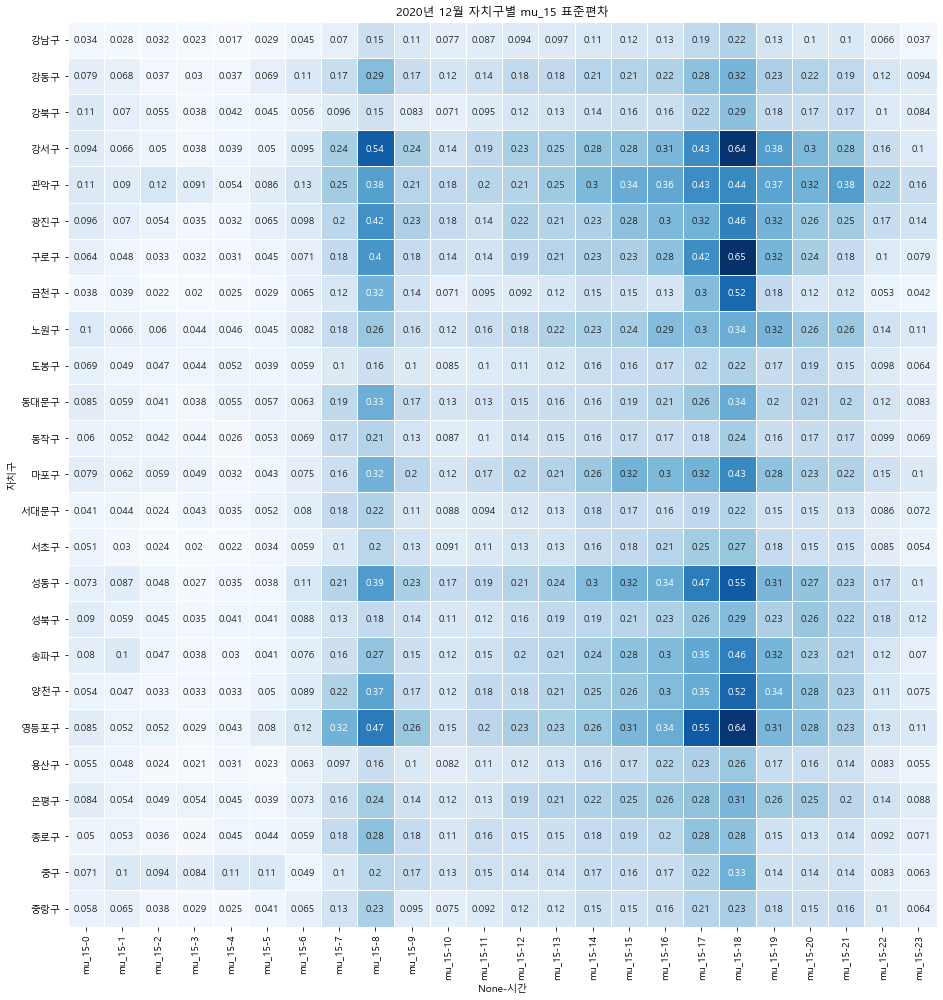

In [29]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 자치구별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [30]:
df_pivot_rho = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['rho'])
df_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  1.230892  1.319724  1.637468  0.906359  0.467259  0.309766  0.775756   
강동구  1.222192  1.144887  1.611237  1.061428  1.123250  0.592527  1.801268   
강북구  1.161345  1.201023  1.313743  1.124433  1.709196  1.408090  1.012911   
강서구  1.266184  1.507704  1.238904  1.190489  1.052225  1.270577  1.556179   
관악구  1.155597  1.503938  1.532945  1.527048  1.529359  1.718501  1.304136   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  2.888021  2.301595  1.716424  1.100017  1.027488  0.934993  0.928040   
강동구  1.356514  1.370576  1.050446  0.770166  0.928741  0.923981  0.934754   
강북구  1.508636  1.152103  0.967497  0.951478  0.749373  0.862191  0.789193   
강서구  1.973021  2.217183  1.480912  0.993437  0.908261  0.926301  1.016280   
관악구  1.276619  1.194959  1.158565  1.022855  0.996355  0.876445  0.856689   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.894911  0.967992  0.936203  1.036455  1.077021  1.306275  1.179090   
강동구  0.932350  0.982952  1.073249  1.351747  1.295367  1.523760  1.256128   
강북구  0.832843  0.903313  0.921626  1.134519  1.122054  1.177277  1.222828   
강서구  0.929232  1.011069  1.007528  1.026157  1.289269  1.336901  1.226521   
관악구  0.870363  0.901068  0.992854  1.025659  1.199036  1.221323  1.136332   

                                   
시간         21        22        23  
자치구                                
강남구  1.197534  1.421352  1.465814  
강동구  1.377306  1.348906  1.240710  
강북구  1.268467  1.593786  1.166059  
강서구  1.632499  1.578683  1.336366  
관악구  1.211699  1.393644  1.437433

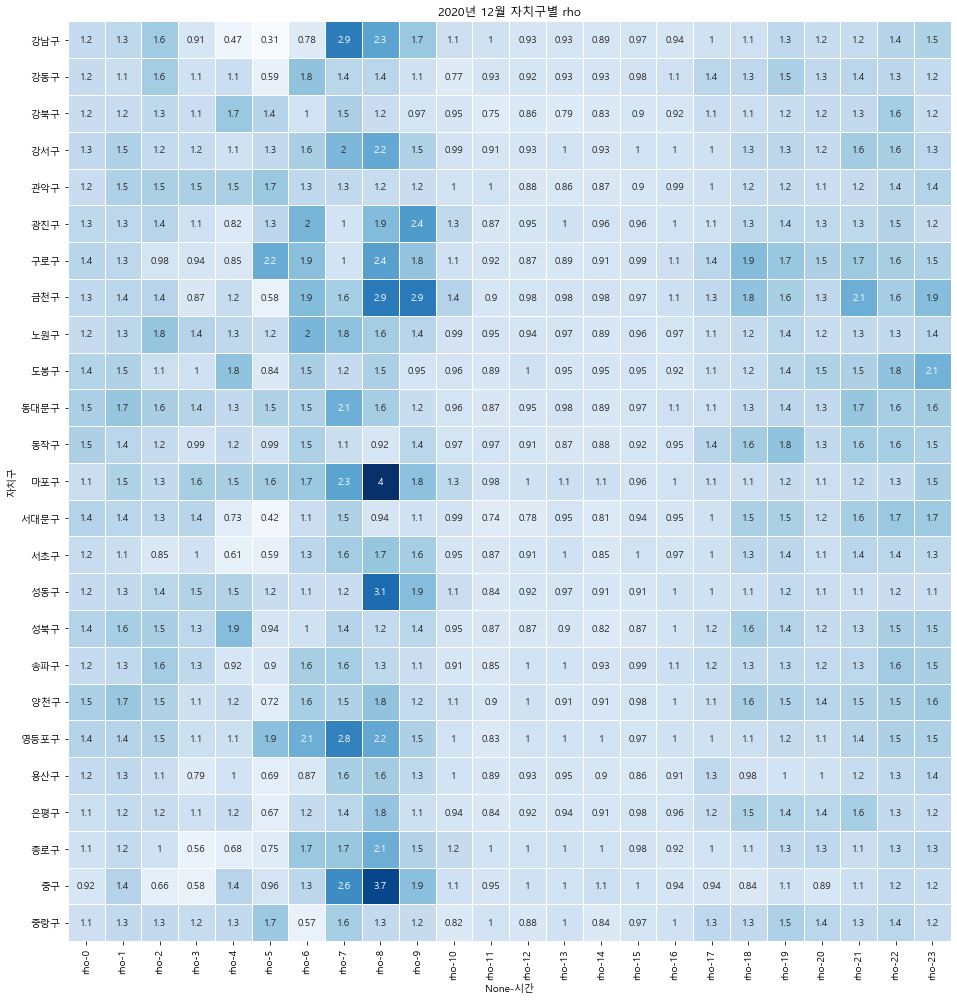

In [31]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 자치구별 rho')
plt.tight_layout()
plt.show()

In [32]:
df_pivot_L_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'])
df_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.380491  0.386483  0.377072  0.302306  0.155705  0.128650  0.218363   
강동구  0.832926  0.807768  0.919879  0.697097  0.611149  0.579605  0.711576   
강북구  0.572935  0.546393  0.638022  0.608169  0.578332  0.452652  0.484583   
강서구  1.274361  1.323496  1.357589  1.144549  1.071904  1.085933  1.174483   
관악구  1.017670  1.146743  1.060876  1.046450  0.850945  0.950731  0.891468   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.364289  0.365087  0.347334  0.352774  0.365437  0.360897  0.364873   
강동구  0.593379  0.682343  0.688173  0.694070  0.715208  0.721516  0.805614   
강북구  0.612579  0.660034  0.626530  0.569656  0.570257  0.583053  0.583373   
강서구  1.350198  1.261459  1.403262  1.448399  1.434573  1.434907  1.506669   
관악구  0.787222  0.779694  1.060925  0.806821  0.866175  0.945274  0.916869   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.358532  0.356036  0.368875  0.372836  0.365930  0.383678  0.353521   
강동구  0.769876  0.804214  0.831381  0.841362  0.895772  0.900978  0.802173   
강북구  0.586575  0.588025  0.657707  0.596480  0.559198  0.613643  0.585575   
강서구  1.455992  1.498208  1.558752  1.630895  1.528935  1.586442  1.454621   
관악구  0.917821  1.017960  1.124163  1.159519  1.261462  1.265864  1.124148   

                                   
시간         21        22        23  
자치구                                
강남구  0.362953  0.372510  0.411094  
강동구  0.925034  0.953932  0.881668  
강북구  0.586720  0.646345  0.612895  
강서구  1.509631  1.560694  1.454412  
관악구  1.065580  1.124947  1.122926

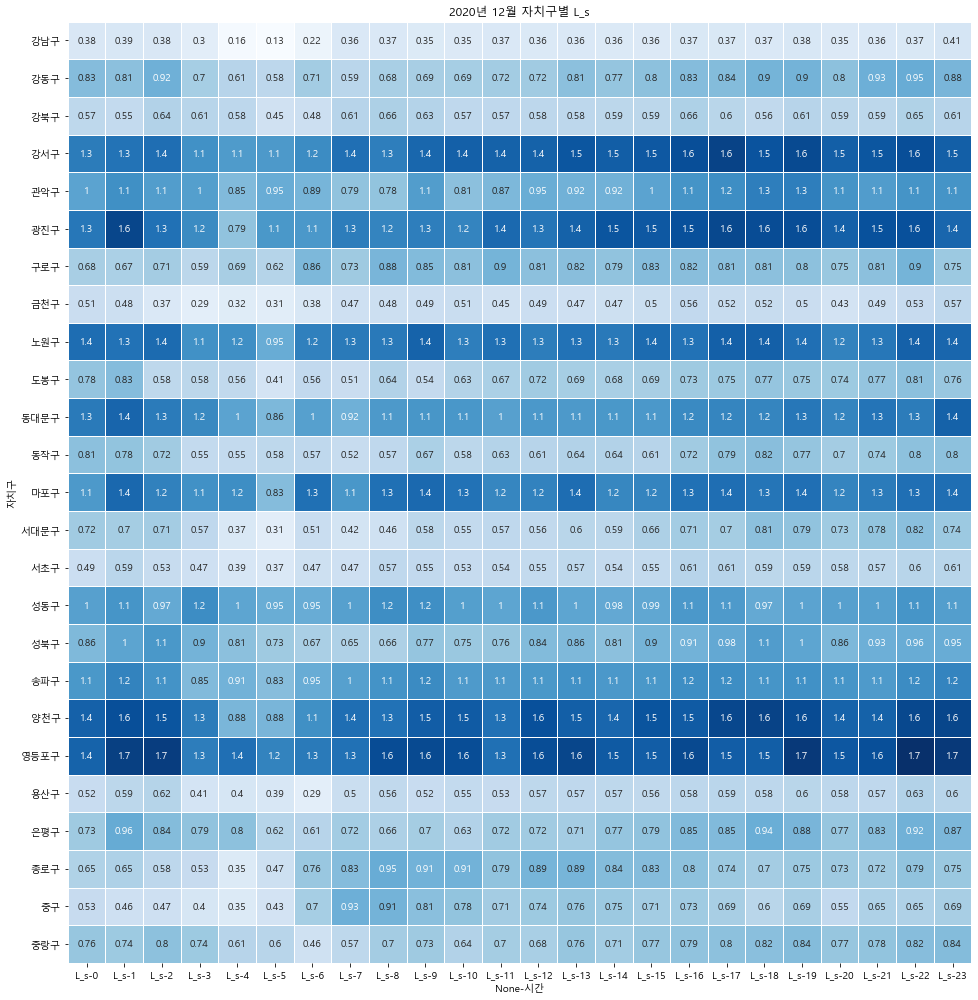

In [33]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 자치구별 L_s')
plt.tight_layout()
plt.show()

In [34]:
df_pivot_L_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
df_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.499183  0.543041  0.543114  0.503727  0.383868  0.380608  0.581928   
강동구  1.176000  1.124133  1.278799  1.197517  1.115268  1.297717  1.337508   
강북구  0.671949  0.587586  0.778561  0.766034  0.801142  0.848908  0.810316   
강서구  1.449609  1.570104  1.757341  1.656291  1.916867  2.170894  2.122918   
관악구  1.594746  1.784304  1.684837  1.620057  1.214159  2.360210  2.176481   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.617548  0.535037  0.483410  0.463908  0.477493  0.454533  0.444776   
강동구  1.004055  1.024164  1.045362  0.938269  0.969238  0.809181  0.982675   
강북구  0.952604  0.916414  0.864978  0.672306  0.718894  0.632306  0.678731   
강서구  1.945313  1.540541  1.630816  1.848646  1.657354  1.464084  1.548909   
관악구  1.527649  1.534046  1.942215  1.106850  1.719778  1.539635  1.187496   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.477285  0.445767  0.477733  0.490318  0.467299  0.476778  0.420989   
강동구  0.986150  0.950181  0.940904  0.930184  1.026950  1.068757  0.892512   
강북구  0.642810  0.621050  0.727783  0.570247  0.555270  0.639433  0.579534   
강서구  1.392293  1.329317  1.504452  1.740274  1.319098  1.307818  1.224052   
관악구  1.351085  1.456555  1.745488  1.761103  2.055660  2.013187  1.682079   

                                   
시간         21        22        23  
자치구                                
강남구  0.434109  0.435148  0.553562  
강동구  1.125466  1.224784  1.123437  
강북구  0.575108  0.675299  0.684054  
강서구  1.342758  1.391291  1.284540  
관악구  1.431780  1.523780  1.687143

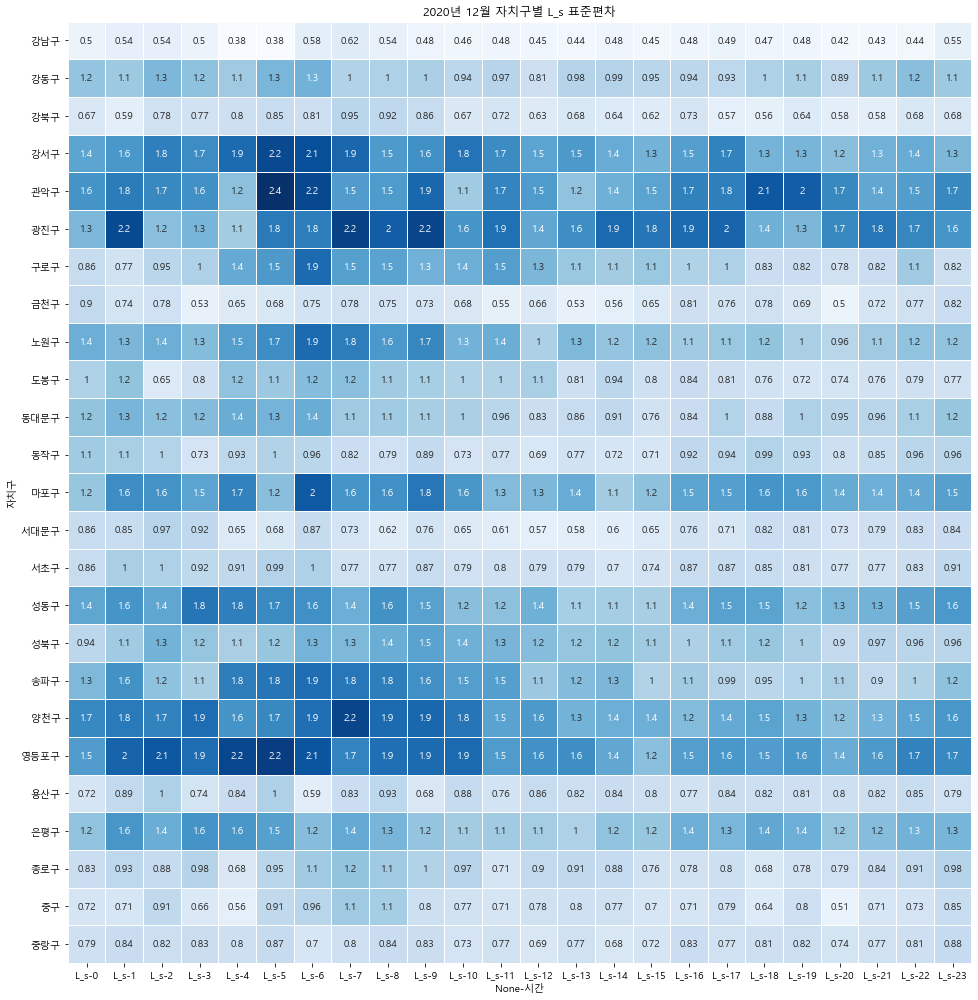

In [35]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 자치구별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [36]:
df_pivot_W_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'])
df_pivot_W_s.head()

W_s                                                         \
시간          0          1          2          3          4          5    
자치구                                                                     
강남구  17.322009  21.112540  28.066943  28.561322  19.044904  15.039235   
강동구  21.867149  27.234398  38.846389  45.134834  55.224132  26.326950   
강북구  10.620999  15.496919  20.218912  31.144943  40.445513  35.246585   
강서구  29.290212  40.588898  66.549455  63.348459  78.281996  52.909122   
관악구  10.883750  16.211104  29.845220  41.630642  45.490703  56.498157   

                                                                             \
시간          6          7         8         9         10        11        12   
자치구                                                                           
강남구  17.616154  17.095170  7.659941  5.586645  5.590404  5.344940  4.030780   
강동구  35.034152  11.995581  5.602107  8.614352  8.871274  6.367328  5.222387   
강북구  24.822893  17.898123  7.425535  8.380124  9.068955  6.178495  4.977427   
강서구  40.121560  18.664338  5.088649  8.737627  9.126924  6.985931  5.277757   
관악구  34.213363  18.830793  7.732198  8.098257  7.420623  5.768645  4.713378   

                                                                           \
시간         13        14        15        16        17        18        19   
자치구                                                                         
강남구  3.392486  2.999856  2.680621  2.549117  2.304938  2.308118  3.714071   
강동구  4.811526  4.193533  3.989891  3.857458  4.085576  3.898111  5.151650   
강북구  3.924460  3.656114  3.497763  3.539641  3.450238  3.092963  4.332860   
강서구  5.536089  5.123393  4.992112  4.542659  3.748922  3.680487  5.700957   
관악구  4.084634  3.946671  3.692749  3.973780  3.626515  3.375271  4.016877   

                                               
시간         20        21         22         23  
자치구                                            
강남구  4.123100  4.787248   8.516395  17.555411  
강동구  5.722027  6.014090   8.656310  14.870763  
강북구  4.973005  5.320039   7.127122  11.812174  
강서구  6.607935  8.495180  13.100251  18.255494  
관악구  4.686186  4.550858   7.351387  11.229496

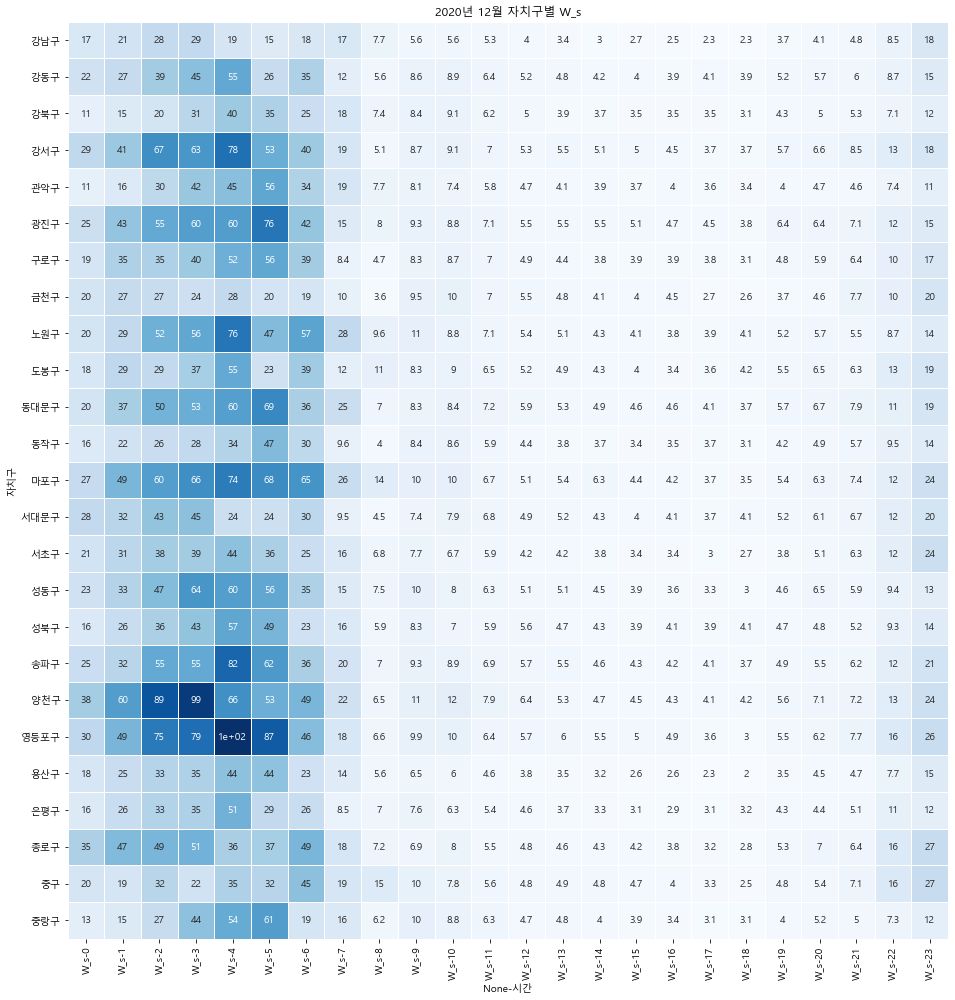

In [37]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 자치구별 W_s')
plt.tight_layout()
plt.show()

In [38]:
df_pivot_W_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
df_pivot_W_s_std.head()

W_s                                                            \
시간          0          1           2          3           4           5    
자치구                                                                        
강남구  25.516327  32.951233   45.346070  51.937795   52.052657   44.521262   
강동구  38.526177  39.115839   49.104541  74.427036  111.256462   44.639290   
강북구  12.410734  20.741079   27.203692  45.190409   59.053160   58.776653   
강서구  37.092061  53.634625  105.764208  96.914907  170.723907   99.368396   
관악구  12.128949  20.308989   46.892773  48.464274   61.504372  141.119529   

                                                                      \
시간          6          7          8          9          10        11   
자치구                                                                    
강남구  59.620631  42.535258  16.222694   7.172539   7.282925  7.820482   
강동구  61.627638  19.888562   7.391571  10.848254  11.278960  6.208754   
강북구  37.535856  27.428086  10.838362   8.489224  11.141178  5.753828   
강서구  77.551630  35.065701   8.497549   8.862233   7.386987  4.480405   
관악구  68.334215  36.561644  17.555348   8.858323   7.136032  4.311104   

                                                                           \
시간         12        13        14        15        16        17        18   
자치구                                                                         
강남구  4.947840  3.800890  3.305213  2.944484  2.878145  2.724601  3.072663   
강동구  4.994410  4.228066  3.538760  3.080079  3.116686  3.618808  3.755480   
강북구  4.350793  3.233999  3.030992  3.024109  2.999307  3.167579  3.024375   
강서구  2.578109  3.021962  2.768420  2.434487  2.210996  2.109911  2.767592   
관악구  3.360646  2.836625  2.819920  2.482144  2.990654  2.763433  2.478982   

                                                         
시간         19        20        21         22         23  
자치구                                                      
강남구  5.549394  4.959668  6.868895  12.547195  32.752087  
강동구  4.803450  7.705605  6.144715   8.307409  16.676089  
강북구  3.935159  5.088003  5.749526   6.427309  18.921141  
강서구  3.974421  4.146880  7.530979  10.883687  16.527493  
관악구  2.770099  3.831783  3.895654   6.605694  10.732822

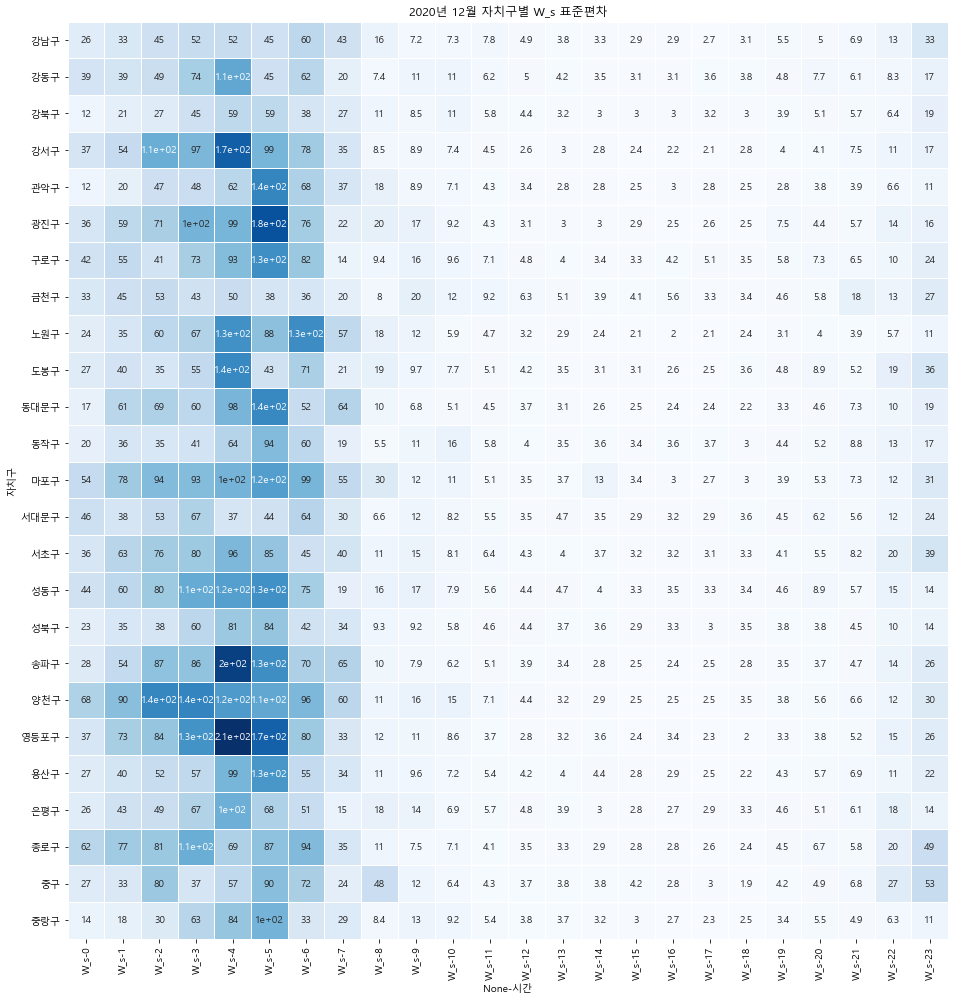

In [39]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 자치구별 W_s 표준편차')
plt.tight_layout()
plt.show()

# 학교/ 아파트/ 지하철역/공원 근처 대여소 분석

In [40]:
s = pd.DataFrame(df['대여소명'].unique()).rename(columns = {0 : 'station'})
s

,station
0,(구)신한은행 중랑교지점
1,(시립)고덕평생학습관
2,(재)FITI시험연구원
3,3호선 매봉역 3번출구앞
4,419민주묘지 입구사거리
...,...
2065,흑석한강푸르지오(110동)
2066,흥국사 정류장
2067,희성오피앙
2068,희훈타워빌 앞


In [41]:
school = []
subway = []
apart = []
park = []
for i in range(len(s)):
    if '출구' in s['station'][i]:
        subway.append(s['station'][i])
    elif '학교' in s['station'][i]:
        school.append(s['station'][i])
    elif '아파트' in s['station'][i]:
        apart.append(s['station'][i]) 
    elif '공원' in s['station'][i]:
        park.append(s['station'][i])

In [42]:
school

['KC 대학교',
 '가락고등학교 앞',
 '가재울 초등학교',
 '강남중학교 앞',
 '강동경희대학교병원 입구',
 '강북중학교 앞',
 '강서공업고등학교 앞',
 '강서초등학교',
 '개포고등학교 정문앞',
 '거여초등학교 옆',
 '건국대학교 (입학정보관)',
 '건국대학교 (행정관)',
 '건국대학교 과학관(이과대) 앞',
 '건국대학교 학생회관',
 '경기여자고등학교 후문 (삼성로3길 입구)',
 '경문고등학교 앞',
 '경일중학교 앞',
 '경희대학교 청운관',
 '고덕초등학교',
 '공항중학교앞',
 '공항초등학교건너편',
 '광남중학교',
 '광양중학교 앞',
 '광운대학교 중앙도서관',
 '광운초등학교 앞',
 '구로중학교앞',
 '구암초등학교 버스정류장',
 '구일고등학교 정문',
 '노일초등학교 앞',
 '답십리초등학교 앞(현대시장 옆)',
 '답십리초등학교 옆 공원',
 '대광고등학교',
 '대진고등학교',
 '도봉고등학교 맞은편',
 '독산고등학교',
 '동대문중학교 옆',
 '동성중학교 앞',
 '동양미래대학교 정문 옆',
 '마곡엠밸리6_7단지 마곡중학교',
 '마곡중학교 후문',
 '면목초등학교',
 '명지대학교 도서관',
 '명지전문대학교 정문 앞',
 '모두의학교',
 '목동1단지아파트 118동 앞 (월촌초등학교 정류소 옆)',
 '목동1단지아파트 상가 앞 (월촌중학교 버스정류소 옆)',
 '묘곡초등학교',
 '문래중학교',
 '밀알학교 입구 (삼성서울병원 입구)',
 '반포중학교 앞(세화여고 맞은편)',
 '방이초등학교',
 '방학중학교 앞',
 '배명고등학교',
 '백석예술대학교 제3캠퍼스 앞',
 '보성중고등학교 후문 앞',
 '북가좌 초등학교',
 '불암고등학교 앞 횡단보도',
 '사당중학교 버스정류소',
 '삼일초등학교 인근',
 '상계중학교(당현2교사거리)',
 '상신초등학교앞 버스정류장',
 '상암월드컵파크5단지(상암중학교)',
 '상암중학교 옆',
 '상일초등학교',
 '새솔초등학교',
 '서울강월초등학교 앞',

In [43]:
len(school)

135

In [44]:
school_data = []
for i in range(len(df)):
    if df['대여소명'][i] in school:
        school_data.append(df.loc[i])
school_data = pd.DataFrame(school_data)
school_data['특성'] = '학교'
school_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
961,강서구,KC 대학교,0,0.040323,0.016129,2.500000,0.714286,62.000000,학교
962,강서구,KC 대학교,1,0.072581,0.016129,4.500000,0.818182,62.000000,학교
963,강서구,KC 대학교,2,0.016129,0.016129,1.000000,0.500000,62.000000,학교
964,강서구,KC 대학교,3,0.032258,0.040323,0.800000,0.444444,24.800000,학교
965,강서구,KC 대학교,4,0.000000,0.000000,0.000000,0.000000,0.000000,학교
...,...,...,...,...,...,...,...,...,...
49617,동대문구,휘봉고등학교 앞,19,0.193548,0.145161,1.333333,0.571429,6.888889,학교
49618,동대문구,휘봉고등학교 앞,20,0.153226,0.112903,1.357143,0.575758,8.857143,학교
49619,동대문구,휘봉고등학교 앞,21,0.201613,0.040323,5.000000,0.833333,24.800000,학교
49620,동대문구,휘봉고등학교 앞,22,0.161290,0.088710,1.818182,0.645161,11.272727,학교


In [45]:
subway

['3호선 매봉역 3번출구앞',
 '419민주묘지역 1번출구',
 '7호선 이수역7번출구',
 '9호선종합운동장역 9번출구',
 'DMC역 2번출구 옆',
 'DMC역 9번출구 앞',
 'DMC역7번출구',
 '가락시장역 3번 출구',
 '가로공원공영주차장 1번 출구',
 '가산디지털단지 7번출구',
 '가양역 8번출구',
 '가좌역 4번출구 앞',
 '가좌역1 번출구 뒤',
 '강남구청역 2번출구 뒤',
 '강남파이낸스센터앞(역삼역2번출구)',
 '강동역 1번출구 앞',
 '강변역 4번출구 뒤',
 '개봉역 1번 출구 자전거보관서쪽',
 '개화산역 2번 출구',
 '거여역 3번출구',
 '거여역 8번출구 뒤',
 '건대입구역 5번출구 뒤',
 '경복궁역 4번출구 뒤',
 '경복궁역 7번출구 앞',
 '경찰병원역 1,2번 출구 사이',
 '경찰병원역 3번출구 앞',
 '고덕역 4번출구',
 '고덕역 5번출구',
 '고려대학교 2번출구',
 '고속터미널역 5번출구 앞',
 '고속터미널역 8-1번, 8-2번 출구 사이',
 '공덕역 2번출구',
 '공덕역 5번출구',
 '공덕역 8번출구',
 '공릉역 1번 출구 앞',
 '공항시장역 2번출구 뒤',
 '공항시장역 4번출구',
 '광나루역 3번 출구',
 '광화문역 1번출구 앞',
 '광화문역 2번출구 앞',
 '광화문역 5번출구',
 '광화문역 6번출구 옆',
 '광화문역 7번출구 앞',
 '광흥창역 2번출구 앞',
 '교대역 5번출구뒤',
 '교대역 6번출구',
 '교보타워 버스정류장(신논현역 3번출구 후면)',
 '구산역 2번 출구',
 '구산역 4번출구',
 '구파발역 2번출구',
 '국회의사당역 3번출구 옆',
 '국회의사당역 5번출구 옆',
 '군자역 7번출구 베스트샵 앞',
 '군자역 7번출구뒤',
 '군자역2번출구',
 '금호역 1번출구 앞',
 '금호역 3번출구',
 '길음역 3번출구 뒤',
 '까치산역 3번 출구',
 '낙성대역 1번출구',
 '낙성대역 3번출구 뒤',
 '남부터미널역 1번출구',


In [46]:
len(subway)

408

In [47]:
subway_data = []
for i in range(len(df)):
    if df['대여소명'][i] in subway:
        subway_data.append(df.loc[i])
subway_data = pd.DataFrame(subway_data)
subway_data['특성'] = '지하철'
subway_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
72,강남구,3호선 매봉역 3번출구앞,0,0.008065,0.040323,0.200000,0.243590,30.400000,지하철
73,강남구,3호선 매봉역 3번출구앞,1,0.024194,0.112903,0.214286,0.264275,11.008676,지하철
74,강남구,3호선 매봉역 3번출구앞,2,0.024194,0.080645,0.300000,0.395907,16.682014,지하철
75,강남구,3호선 매봉역 3번출구앞,3,0.104839,0.024194,4.333333,2.711376,113.142857,지하철
76,강남구,3호선 매봉역 3번출구앞,4,0.016129,0.008065,2.000000,2.266667,301.142857,지하철
...,...,...,...,...,...,...,...,...,...
49713,동작구,흑석역 4번출구,19,0.129032,0.225806,0.571429,0.000000,0.000000,지하철
49714,동작구,흑석역 4번출구,20,0.072581,0.129032,0.562500,0.000000,0.000000,지하철
49715,동작구,흑석역 4번출구,21,0.080645,0.080645,1.000000,0.000000,0.000000,지하철
49716,동작구,흑석역 4번출구,22,0.096774,0.072581,1.333333,0.000000,0.000000,지하철


In [48]:
apart

['DMC센트럴아이파크아파트',
 'DMC엘가아파트 앞',
 'ESA아파트 상가 앞',
 'LG한강 자이아파트 앞',
 'LIGA 아파트 앞',
 'LIG강촌아파트 103동앞',
 'e 편한세상 보문아파트 내',
 '가락미륭아파트 앞',
 '가락삼환아파트 앞',
 '강남한양수자인아파트',
 '강동롯데캐슬퍼스트 아파트(관리동)',
 '강변아파트 310동 앞',
 '개봉아이파크아파트 앞',
 '개봉푸르지오아파트 상가',
 '개포1단지아파트 입구 (보도육교)',
 '건영아파트 앞',
 '고덕동 아남아파트',
 '고척LIGA아파트 앞',
 '공릉1단지아파트',
 '공릉동풍림아파트 101동',
 '공릉풍림아파트 108동',
 '구로동롯데아파트',
 '구룡마을 입구 (래미안블레스티지 아파트)',
 '구룡초사거리 (현대아파트10동 앞 )',
 '구룡터널 입구(개포1단지아파트)',
 '구의7단지현대아파트',
 '극동늘푸른아파트',
 '금강수목원아파트 앞',
 '금호 어울림 아파트 앞',
 '길음뉴타운푸르지오아파트 3단지',
 '길음래미안아파트817동 상가 앞',
 '남산타운아파트 버스정류장',
 '다성이즈빌아파트(호원대 대각선 맞은편)',
 '답십리 래미안엘파인아파트 입구',
 '대림경동아파트앞',
 '대림아파트 사거리',
 '대림아파트 후문 상가 옆',
 '대호프라자아파트',
 '도곡동 경남아파트 건너편',
 '도봉한신아파트 주변',
 '돈암삼성풍림아파트',
 '동대문롯데캐슬아파트 앞',
 '동신아파트 104동 앞',
 '두산대림아파트 삼거리',
 '두산위브아파트 옆 상가건물 앞',
 '둔촌신성미소지움아파트',
 '래미안금호하이리버 아파트 102동 옆',
 '래미안라센트아파트 103동 앞',
 '래미안신공덕3차아파트',
 '래미안월곡아파트 입구',
 '리센츠아파트',
 '마천금호어울림 1차아파트 건너편',
 '멤피스아파트 앞',
 '면목 대원칸타빌아파트',
 '면목도시개발아파트 1동 앞',
 '면목삼익아파트 앞',
 '목동11단지 아파트',
 '목동5단지아파트 501동',

In [49]:
len(apart)

181

In [50]:
apart_data = []
for i in range(len(df)):
    if df['대여소명'][i] in apart:
        apart_data.append(df.loc[i])
apart_data = pd.DataFrame(apart_data)
apart_data['특성'] = '아파트'
apart_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
456,서대문구,DMC센트럴아이파크아파트,0,0.040323,0.072581,0.555556,0.629139,18.698413,아파트
457,서대문구,DMC센트럴아이파크아파트,1,0.056452,0.072581,0.777778,0.834197,19.805556,아파트
458,서대문구,DMC센트럴아이파크아파트,2,0.024194,0.040323,0.600000,0.673469,34.100000,아파트
459,서대문구,DMC센트럴아이파크아파트,3,0.008065,0.048387,0.166667,0.186047,23.619048,아파트
460,서대문구,DMC센트럴아이파크아파트,4,0.000000,0.008065,0.000000,0.000000,0.000000,아파트
...,...,...,...,...,...,...,...,...,...
48871,서대문구,홍은센트레빌 아파트 앞,19,0.040323,0.080645,0.500000,0.000000,0.000000,아파트
48872,서대문구,홍은센트레빌 아파트 앞,20,0.072581,0.096774,0.750000,0.000000,0.000000,아파트
48873,서대문구,홍은센트레빌 아파트 앞,21,0.056452,0.080645,0.700000,0.000000,0.000000,아파트
48874,서대문구,홍은센트레빌 아파트 앞,22,0.080645,0.056452,1.428571,0.000000,0.000000,아파트


In [51]:
park

['가온문화공원',
 '강일 다솜 어린이 공원',
 '계남공원 입구 주출입구 좌측',
 '고척근린공원 고척도서관 앞',
 '구로리공원',
 '구룡근린공원',
 '구의공원(테크노마트 앞)',
 '궁동생태공원',
 '금암 문화공원',
 '금천폭포공원 앞',
 '길음8골어린이공원 옆',
 '꿈돌이공원 앞',
 '나들목공원',
 '남산공원 야외식물원 앞',
 '내곡3단지 어린이공원 앞',
 '노들나루공원 입구',
 '노량진근린공원 대방공원',
 '노해근린공원내',
 '늘푸른공원 앞',
 '능골근린공원',
 '다산 어린이공원',
 '달맞이공원',
 '당고개공원 대여소',
 '당현천근린공원',
 '대학로 마로니에공원',
 '독립문 어린이 공원',
 '독산근린공원 입구',
 '동명근린공원 진입로 (아리수로)',
 '동인오피스텔 건너편 소공원',
 '뒷벌공원 옆',
 '등나무 근린공원(시립북서울미술관 앞)',
 '마곡문화공원',
 '마포 신수공원 앞',
 '마포어린이공원',
 '만해공원',
 '말우물 어린이 공원',
 '명일근린공원공동체텃밭',
 '목마공원',
 '목월공원 앞',
 '문배어린이공원 앞',
 '문정동 근린공원',
 '문정동 글샘 공원',
 '문화촌 공원',
 '미래사랑어린이공원 앞',
 '방화근린공원',
 '백토공원 앞',
 '볏골공원',
 '보라매공원 보도육교',
 '보라매공원 정문',
 '부엉이공원 앞',
 '북한산생태공원입구(교통섬)',
 '사육신공원앞',
 '사평리 공원',
 '삼성도로공원',
 '삼청공원 앞',
 '상림마을 생태공원',
 '샛강생태공원방문자센터 앞',
 '샛마을 근린공원',
 '생태공원앞 교차로(조명탑)',
 '서강나루 공원',
 '서남환경공원 버스정류장',
 '석촌호수교차로 (송파나루근린공원 앞)',
 '섬들근린공원',
 '세종로공원',
 '솔밭공원역',
 '송이공원',
 '신내능말공원',
 '신내어울공원 앞',
 '신도림테크노근린공원',
 '신트리공원 입구',
 '앙카라공원 앞',
 '양지근린공원앞',
 '어린이대공원정문',
 '연

In [52]:
len(park)

104

In [53]:
park_data = []
for i in range(len(df)):
    if df['대여소명'][i] in park:
        park_data.append(df.loc[i])
park_data = pd.DataFrame(park_data)
park_data['특성'] = '공원'
park_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
2574,마포구,가온문화공원,0,0.024194,0.064516,0.375000,0.432990,19.727273,공원
2575,마포구,가온문화공원,1,0.016129,0.040323,0.400000,0.461538,31.885714,공원
2576,마포구,가온문화공원,2,0.032258,0.032258,1.000000,1.000000,46.500000,공원
2577,마포구,가온문화공원,3,0.016129,0.008065,2.000000,1.428571,206.666667,공원
2578,마포구,가온문화공원,4,0.008065,0.008065,1.000000,1.000000,186.000000,공원
...,...,...,...,...,...,...,...,...,...
49545,중구,훈련원공원주차장 앞,19,0.088710,0.266129,0.333333,0.384615,4.696970,공원
49546,중구,훈련원공원주차장 앞,20,0.177419,0.169355,1.047619,1.031002,8.925803,공원
49547,중구,훈련원공원주차장 앞,21,0.185484,0.056452,3.285714,1.649526,31.295238,공원
49548,중구,훈련원공원주차장 앞,22,0.056452,0.169355,0.333333,0.384615,7.380952,공원


In [54]:
data = pd.merge(school_data, subway_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, apart_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, park_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
0,강서구,KC 대학교,0,0.040323,0.016129,2.500000,0.714286,62.000000,학교
1,강서구,KC 대학교,1,0.072581,0.016129,4.500000,0.818182,62.000000,학교
2,강서구,KC 대학교,2,0.016129,0.016129,1.000000,0.500000,62.000000,학교
3,강서구,KC 대학교,3,0.032258,0.040323,0.800000,0.444444,24.800000,학교
4,강서구,KC 대학교,4,0.000000,0.000000,0.000000,0.000000,0.000000,학교
...,...,...,...,...,...,...,...,...,...
19934,중구,훈련원공원주차장 앞,19,0.088710,0.266129,0.333333,0.384615,4.696970,공원
19935,중구,훈련원공원주차장 앞,20,0.177419,0.169355,1.047619,1.031002,8.925803,공원
19936,중구,훈련원공원주차장 앞,21,0.185484,0.056452,3.285714,1.649526,31.295238,공원
19937,중구,훈련원공원주차장 앞,22,0.056452,0.169355,0.333333,0.384615,7.380952,공원


In [55]:
data_pivot_lambda = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'])
data_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.074560  0.054901  0.044200  0.024504  0.021014  0.023263  0.053893   
아파트  0.085040  0.062511  0.036758  0.024505  0.016129  0.016307  0.020094   
지하철  0.102391  0.082411  0.058112  0.040540  0.032693  0.049336  0.096853   
학교   0.065916  0.049152  0.032495  0.022830  0.018204  0.014231  0.024549   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.095301  0.245425  0.154079  0.117478  0.147255  0.189361  0.207894   
아파트  0.070219  0.168464  0.103457  0.094457  0.121458  0.166993  0.182142   
지하철  0.228989  0.424731  0.272909  0.208116  0.249881  0.307262  0.338828   
학교   0.061314  0.170007  0.129507  0.097308  0.111658  0.155598  0.165738   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.235887  0.273573  0.308545  0.350806  0.409584  0.312267  0.238524   
아파트  0.193593  0.222688  0.261317  0.328284  0.428043  0.324586  0.243985   
지하철  0.368971  0.399391  0.457602  0.552894  0.643639  0.417299  0.309634   
학교   0.173091  0.198470  0.233574  0.256938  0.335685  0.239267  0.193430   

                                   
시간         21        22        23  
특성                                 
공원   0.265664  0.153614  0.097162  
아파트  0.262876  0.172028  0.109339  
지하철  0.308942  0.206930  0.135417  
학교   0.202917  0.145043  0.098494

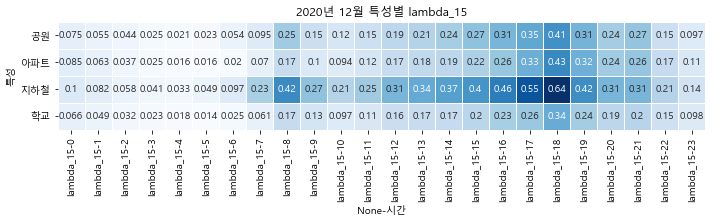

In [56]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 특성별 lambda_15')
plt.tight_layout()
plt.show()

In [57]:
data_pivot_lambda_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
data_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.077284  0.061346  0.055703  0.028472  0.034626  0.043846  0.085141   
아파트  0.082332  0.059620  0.041700  0.033633  0.023908  0.031210  0.039832   
지하철  0.098583  0.081163  0.056989  0.045907  0.040056  0.071029  0.123179   
학교   0.072379  0.057550  0.045216  0.044166  0.027729  0.026670  0.047319   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.186500  0.349645  0.208832  0.120859  0.137219  0.159626  0.181476   
아파트  0.133442  0.325588  0.124395  0.098845  0.103312  0.132139  0.155550   
지하철  0.281847  0.485462  0.263914  0.182479  0.205883  0.243967  0.261381   
학교   0.077048  0.232500  0.156481  0.111422  0.101919  0.132986  0.135806   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.225159  0.249556  0.257474  0.285604  0.351965  0.260537  0.201529   
아파트  0.160755  0.175609  0.218360  0.249777  0.330714  0.249653  0.189294   
지하철  0.294693  0.321610  0.375850  0.452406  0.516966  0.315978  0.246060   
학교   0.146344  0.169547  0.208096  0.226399  0.309145  0.212673  0.168252   

                                   
시간         21        22        23  
특성                                 
공원   0.262051  0.146393  0.096017  
아파트  0.222609  0.143230  0.087299  
지하철  0.247724  0.177262  0.123564  
학교   0.174570  0.143237  0.110468

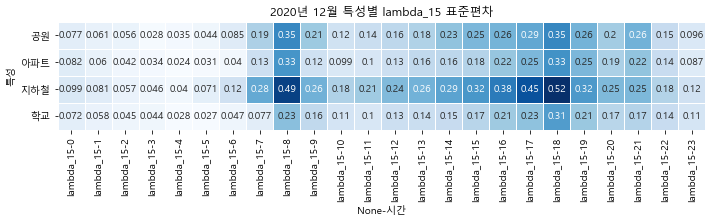

In [58]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 특성별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [59]:
data_pivot_mu = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'])
data_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.058724  0.049240  0.031172  0.019851  0.019386  0.040245  0.065292   
아파트  0.063961  0.046115  0.032124  0.024550  0.022010  0.041392  0.082249   
지하철  0.101120  0.072777  0.056570  0.040698  0.031507  0.031092  0.059950   
학교   0.045139  0.037556  0.022652  0.015595  0.016603  0.029412  0.062204   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.189516  0.302264  0.176489  0.139268  0.187267  0.239377  0.238601   
아파트  0.228257  0.350428  0.184014  0.157503  0.173899  0.206336  0.212574   
지하철  0.177894  0.435761  0.268125  0.209756  0.247371  0.307993  0.330527   
학교   0.164018  0.261504  0.152574  0.131819  0.152811  0.181333  0.194023   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.275667  0.288074  0.296449  0.339795  0.362128  0.236042  0.204637   
아파트  0.238817  0.245990  0.269292  0.277892  0.291436  0.202727  0.186731   
지하철  0.368517  0.403680  0.430028  0.501838  0.633578  0.439674  0.352447   
학교   0.212049  0.234820  0.251779  0.265595  0.243952  0.166864  0.146169   

                                   
시간         21        22        23  
특성                                 
공원   0.189283  0.117711  0.082506  
아파트  0.179692  0.114775  0.074853  
지하철  0.334598  0.197936  0.134745  
학교   0.141426  0.097486  0.062500

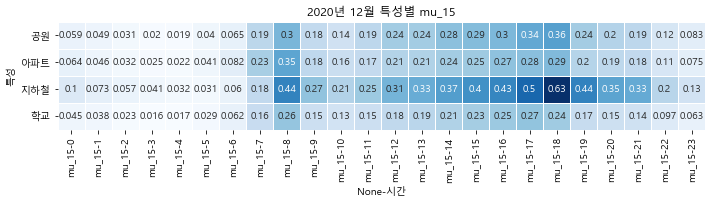

In [60]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 특성별 mu_15')
plt.tight_layout()
plt.show()

In [61]:
data_pivot_mu_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
data_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.067421  0.056165  0.035126  0.027889  0.038742  0.060407  0.091678   
아파트  0.062062  0.039556  0.032609  0.029519  0.035089  0.059635  0.093583   
지하철  0.089185  0.067031  0.063891  0.051292  0.040047  0.048226  0.072802   
학교   0.042184  0.041462  0.023094  0.019489  0.034422  0.050763  0.085137   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.183129  0.294095  0.170809  0.110582  0.127243  0.176932  0.184891   
아파트  0.215810  0.299824  0.151982  0.112279  0.120574  0.141409  0.133215   
지하철  0.208158  0.463371  0.233814  0.158408  0.183482  0.217197  0.240096   
학교   0.173001  0.268237  0.145088  0.109324  0.110563  0.122131  0.146778   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.228695  0.243868  0.220840  0.290218  0.349043  0.202761  0.177548   
아파트  0.151756  0.166275  0.195991  0.231535  0.294193  0.155603  0.148096   
지하철  0.277512  0.312383  0.323523  0.379712  0.535697  0.365069  0.286711   
학교   0.139641  0.172510  0.178280  0.215888  0.229622  0.136265  0.130784   

                                   
시간         21        22        23  
특성                                 
공원   0.153038  0.089334  0.079209  
아파트  0.150855  0.094874  0.061941  
지하철  0.252824  0.159923  0.113615  
학교   0.126673  0.084116  0.054296

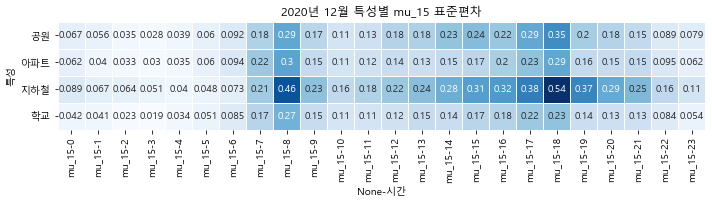

In [62]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 특성별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [63]:
data_pivot_rho = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['rho'])
data_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.478457  1.270214  1.555055  1.035695  0.885421  0.917615  1.542419   
아파트  1.574276  1.556820  1.369413  0.915651  0.661431  0.454310  0.483365   
지하철  1.106327  1.359043  1.313240  1.211645  1.204823  1.857393  2.363511   
학교   1.559126  1.407148  1.361729  1.152544  1.010640  0.663546  0.845589   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.844384  2.006478  1.416719  0.991334  0.837729  0.799723  0.927655   
아파트  0.468668  0.603956  0.636317  0.583416  0.726288  0.791945  0.797114   
지하철  2.180210  1.432518  1.319375  1.094160  1.068848  1.019371  1.053387   
학교   0.715512  1.849642  1.901930  1.031382  0.813749  0.878894  0.943167   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.859528  0.929534  1.064354  1.075150  1.457523  1.515841  1.419327   
아파트  0.760529  0.891766  0.966262  1.298920  1.782785  1.730631  1.504552   
지하철  1.019464  1.008542  1.061852  1.206598  1.139405  1.052094  0.983157   
학교   0.823122  0.878361  0.935308  1.221043  1.588807  1.692991  1.531514   

                                   
시간         21        22        23  
특성                                 
공원   1.558629  1.419574  1.339629  
아파트  1.639642  1.685949  1.707894  
지하철  1.076202  1.234399  1.203721  
학교   1.646834  1.817184  1.818427

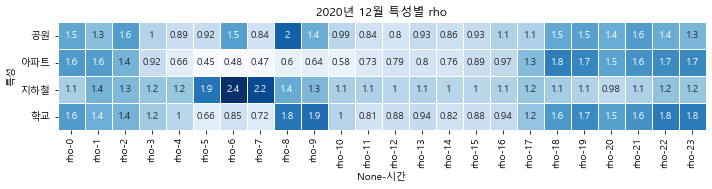

In [64]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 특성별 rho')
plt.tight_layout()
plt.show()

In [65]:
data_pivot_L_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'])
data_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.917462  0.845769  0.900412  0.678364  0.521444  0.408454  0.649758   
아파트  0.876650  0.956838  0.787490  0.585181  0.486593  0.286559  0.282770   
지하철  1.200143  1.445958  1.265353  1.112353  1.085581  1.343499  1.607640   
학교   0.717099  0.644612  0.715383  0.472125  0.464387  0.245970  0.286110   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.526997  0.751794  0.735859  0.742201  0.731204  0.709475  0.810677   
아파트  0.330511  0.427078  0.512821  0.531961  0.587883  0.667982  0.745523   
지하철  1.584166  1.411549  1.446841  1.400714  1.437255  1.397009  1.422557   
학교   0.307580  0.489764  0.514990  0.488396  0.530796  0.588807  0.571365   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.768133  0.846938  0.917617  0.885615  0.958645  0.994571  0.942663   
아파트  0.691011  0.745922  0.786431  0.875877  0.967021  1.009565  0.933091   
지하철  1.400743  1.360929  1.478819  1.502913  1.347544  1.243447  1.160524   
학교   0.566151  0.577374  0.618099  0.629627  0.768952  0.760646  0.739302   

                                   
시간         21        22        23  
특성                                 
공원   1.010402  0.969694  0.932054  
아파트  0.984628  0.983206  0.978030  
지하철  1.180447  1.338608  1.256978  
학교   0.762479  0.775583  0.799763

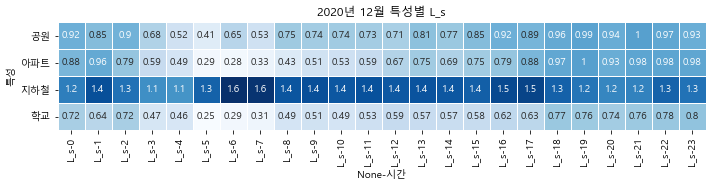

In [66]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 특성별 L_s')
plt.tight_layout()
plt.show()

In [67]:
data_pivot_L_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
data_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.210342  1.029562  1.231132  0.992997  1.112917  1.038575  1.180120   
아파트  1.074927  1.177800  1.040080  0.915912  0.936002  0.613034  0.657481   
지하철  1.391806  1.782643  1.527577  1.493028  1.794030  2.118740  2.191102   
학교   0.977535  0.903366  1.082756  0.896097  1.065760  0.673412  0.694587   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.996698  1.271563  1.045452  0.866705  0.901581  0.732582  0.942070   
아파트  0.700635  0.727078  0.714567  0.659476  0.649315  0.709195  0.909224   
지하철  2.085539  1.840626  1.832234  1.701321  1.659985  1.529478  1.461879   
학교   0.510643  0.809822  0.732015  0.697054  0.659265  0.766927  0.642491   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.814683  0.922999  1.010927  0.889793  1.095940  1.092195  1.086279   
아파트  0.753057  0.804158  0.837774  0.937644  1.025781  1.113128  1.044113   
지하철  1.528293  1.365737  1.563119  1.595187  1.326066  1.175697  1.237185   
학교   0.695259  0.675652  0.753153  0.733228  0.930092  0.938565  0.876554   

                                   
시간         21        22        23  
특성                                 
공원   1.167116  1.164049  1.115597  
아파트  1.131026  1.085940  1.138567  
지하철  1.323482  1.440422  1.351421  
학교   0.884607  0.991396  1.053417

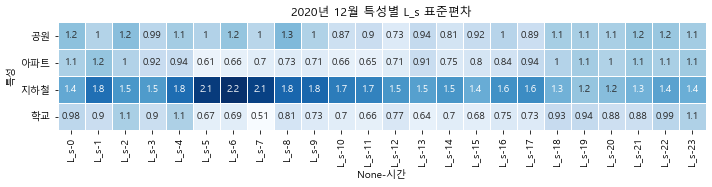

In [68]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 특성별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [69]:
data_pivot_W_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'])
data_pivot_W_s.head()

W_s                                                         \
시간          0          1          2          3          4          5    
특성                                                                      
공원   24.402998  30.941343  50.600065  50.496462  46.845171  34.888876   
아파트  22.993426  32.756907  44.305548  41.099538  43.230446  23.888013   
지하철  20.123556  38.465111  46.945964  58.070684  70.963173  84.884490   
학교   26.579808  30.448939  50.389671  41.556856  45.300861  21.947401   

                                                                             \
시간          6          7         8         9         10        11        12   
특성                                                                            
공원   34.940982   8.912195  7.065010  8.921819  9.141733  5.916854  4.622235   
아파트  16.369736   6.342417  3.668506  6.575278  6.173244  5.356106  4.613852   
지하철  58.729725  23.586814  7.327464  9.371672  9.591467  7.822199  5.837346   
학교   16.201270   8.533032  8.962791  8.317807  7.434730  6.048488  4.801736   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   4.951441  4.186774  3.983465  4.000385  3.617748  3.884751  5.248749   
아파트  4.590734  3.950379  3.826088  3.791848  3.826868  3.874947  5.325935   
지하철  5.562931  4.977082  4.482105  4.276940  3.791520  3.121372  4.209372   
학교   4.674949  4.022222  3.631879  3.338865  3.465540  4.161137  5.737923   

                                               
시간         20        21         22         23  
특성                                             
공원   6.227550  6.690517  11.632321  20.307612  
아파트  5.853551  6.622584   9.935013  17.921741  
지하철  5.366126  5.603374  11.154323  18.379763  
학교   6.966354  7.431192  12.070461  19.952474

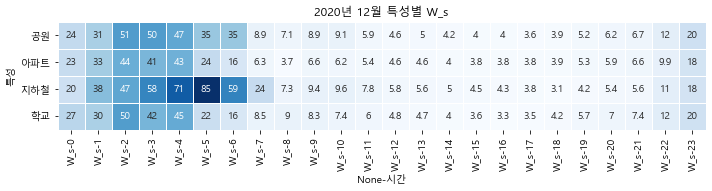

In [70]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 특성별 W_s')
plt.tight_layout()
plt.show()

In [71]:
data_pivot_W_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
data_pivot_W_s_std.head()

W_s                                                           \
시간          0          1          2          3           4           5    
특성                                                                        
공원   30.495765  37.668877  91.668756  84.518111  106.776994  114.270386   
아파트  39.264994  48.932100  58.555280  69.407694   87.756106   55.529858   
지하철  22.851391  52.698587  64.845266  88.387189  153.551552  147.576159   
학교   37.804640  47.697384  82.804802  85.247265  107.673208   50.676972   

                                                                      \
시간           6          7          8          9         10        11   
특성                                                                     
공원    67.847793  13.420662  12.357652  12.078035  9.041155  5.257541   
아파트   40.332956  12.748344   6.467915   8.126455  5.549599  4.557267   
지하철  102.893266  42.404076  10.953219  11.172371  8.938645  5.409371   
학교    32.715542  19.641849  21.909190  14.536000  8.543517  5.907029   

                                                                           \
시간         12        13        14        15        16        17        18   
특성                                                                          
공원   3.888028  3.938775  3.354310  3.095861  3.173252  2.995607  3.726519   
아파트  4.191105  4.053829  3.296916  3.042895  3.414058  3.379290  3.322304   
지하철  3.430641  3.406586  2.850796  2.488452  2.284004  2.268498  2.148604   
학교   4.259176  4.430084  3.525787  3.187992  2.888049  3.250401  4.151556   

                                                         
시간         19        20        21         22         23  
특성                                                       
공원   4.262725  6.000517  5.843227  12.704826  24.881131  
아파트  4.640654  5.256264  6.585138   9.665707  25.174903  
지하철  2.698792  4.036465  4.829633  12.196719  26.345137  
학교   6.940820  8.404921  7.908833  18.451821  28.461471

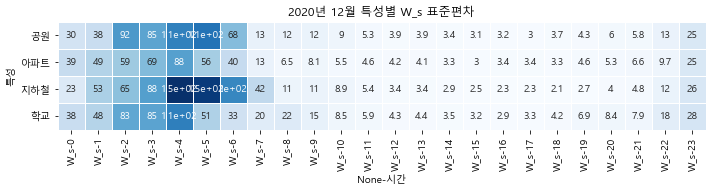

In [72]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월 특성별 W_s 표준편차')
plt.tight_layout()
plt.show()